In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, KFold
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
sns.set(style="whitegrid")


# Simulacion de los datos

Este código genera datos sintéticos para un problema de **regresión lineal** utilizando la función `make_regression` de scikit-learn. Los parámetros controlan varios aspectos de los datos generados, y a continuación se explica cada uno desde una perspectiva estadística:

- **`n_samples`**: Este parámetro define el número de muestras que se generarán. En este caso, se están creando `100` muestras. Cada muestra se asocia con un vector de características $ X $  y un valor objetivo $ y $  que es generado por un modelo lineal con ruido añadido. Este tipo de datos es típico para entrenar y probar modelos de regresión supervisada, donde el objetivo es aprender a predecir $ y $  en función de $ X $ .

- **`n_features`**: Representa el número de características o variables independientes que tiene cada muestra. En este caso, cada muestra tiene 10 características. En términos estadísticos, cada característica puede pensarse como un predictor en un modelo de regresión lineal multivariante.

- **`noise`**: Controla la cantidad de ruido gaussiano agregado a las respuestas $ y $ . El ruido representa la variabilidad no explicada por $ \alpha $s características $ X $ , que en la práctica puede surgir de factores no medidos o de la variabilidad inherente en el proceso. En este caso, se está introduciendo un nivel de ruido de 10 unidades. Esto permite que el modelo generado tenga un error irreducible, emulando escenarios del mundo real donde los datos no son perfectamente lineales.

- **`n_informative`**: Especifica cuántas de las características son verdaderamente "informativas" o relevantes para la generación de los valores de $ y $ . En este caso, todas las características son informativas (`n_informative=10`), lo que significa que cada una de las 10 variables tiene un peso en el modelo generativo subyacente.

- **`tail_strength`**: Controla la proporción de varianza explicada por las características menos relevantes, en un proceso llamado "decaimiento del espectro". Esto afecta cómo las características menos informativas contribuyen a la varianza total. Un valor de 0.5 indica que estas características tienen una influencia moderada en el resultado.

- **`effective_rank`**: Si se especifica, este parámetro controla el rango efectivo de la matriz de características $ X $ . El rango bajo implica una dependencia lineal entre algunas características, reduciendo la dimensionalidad efectiva de los datos. Si es `None`, todas las características serán aproximadamente independientes entre sí.

- **`random_state`**: Asegura la reproducibilidad del conjunto de datos generado, fijando la semilla para los números aleatorios.

### Contexto en el Aprendizaje Estadístico

Este tipo de datos es útil para evaluar cómo un modelo de regresión lineal puede aprender una relación entre las características $ X $  y la variable de salida $ y $ , incluso cuando los datos contienen ruido. El proceso de ajuste del modelo puede verse como una búsqueda del mejor conjunto de coeficientes que minimicen el error entre las predicciones del modelo y los valores observados de $ y $ , un enfoque común en modelos de **aprendizaje supervisado**.

Este código genera un conjunto de datos adecuado para probar conceptos como el **sobreajuste** y **subajuste**, dependiendo de los niveles de ruido y de la cantidad de características informativas. También es útil para analizar el **sesgo** y la **varianza** en el contexto de modelos lineales.


Dimensiones de X (características): (200, 100)
Dimensiones de y (objetivo): (200,)

Estadísticos básicos de las características (X):
        Feature_1   Feature_2   Feature_3   Feature_4   Feature_5   Feature_6  \
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean     0.080347    0.031720    0.070885   -0.124806   -0.169679    0.088002   
std      1.040888    0.921138    0.898447    1.041017    1.034186    1.067768   
min     -2.640697   -3.153357   -2.703993   -2.984836   -2.886694   -3.026057   
25%     -0.527997   -0.461127   -0.472860   -0.792200   -0.831938   -0.641061   
50%      0.156072    0.121095    0.156894   -0.009613   -0.195092    0.127545   
75%      0.827849    0.695500    0.611417    0.553184    0.507775    0.773279   
max      2.529128    2.054874    2.819087    2.372397    3.298541    2.843939   

        Feature_7   Feature_8   Feature_9  Feature_10  ...  Feature_91  \
count  200.000000  200.000000  200.000000  200.000000  ...  200

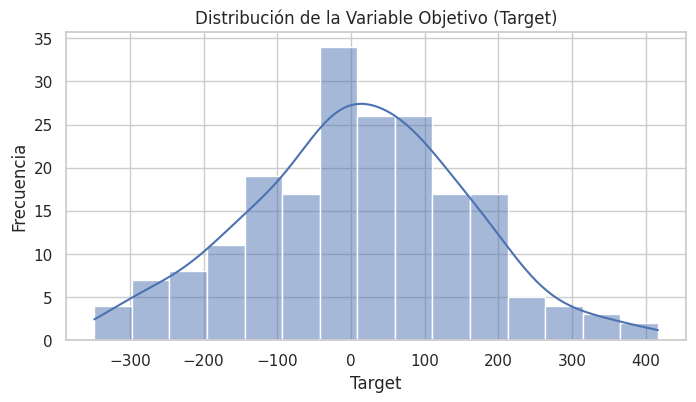


Conjunto de datos de alta dimensión: visualización simplificada
Primeras 5 muestras de las primeras 5 características (X):
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5
0  -0.960501   0.779304  -0.795544   0.916272  -1.076117
1   0.312213  -0.424820  -1.014036   0.338141  -0.097939
2   2.378240   0.324113   0.538265  -0.529675   1.554689
3  -1.213338   1.700188  -0.477581  -1.556942   0.112488
4  -2.284535  -0.199352   0.010118   0.451324   0.290399
Últimas 5 características del conjunto de datos (X):
   Feature_96  Feature_97  Feature_98  Feature_99  Feature_100
0   -1.507401    0.626736   -0.246956   -1.268047     0.443533
1    1.619516    1.057360    1.587862    0.573443    -0.594037
2   -0.926992   -0.200508    0.354043    0.374534    -0.284635
3   -1.881411    1.536536   -0.359224    0.026000     0.947501
4   -0.029456    0.104876    0.562871    0.147426     0.534018

Correlación de las características con el Target:
Feature_48    0.570750
Feature_3     0.490623
Featur

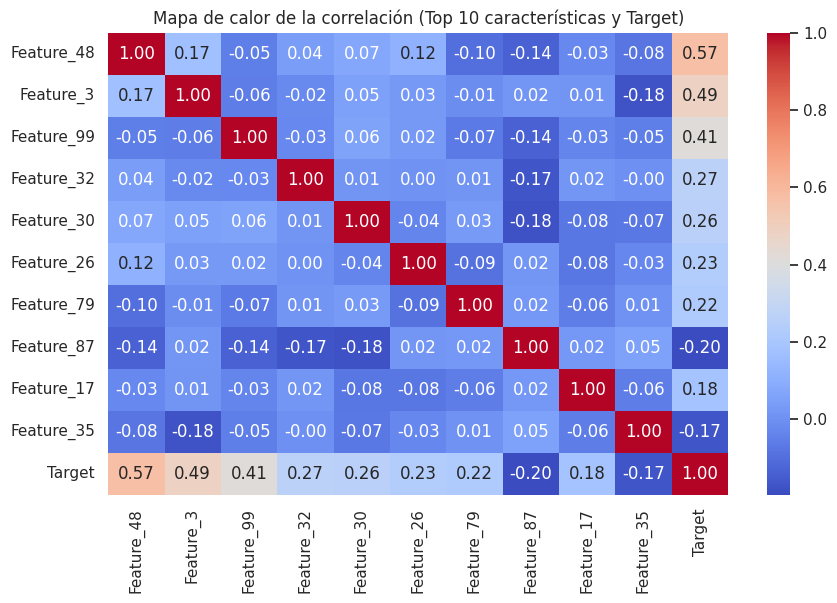

In [2]:
# Importamos las bibliotecas necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Función para crear datos sintéticos y realizar EDA
def create_data(n_samples=100, n_features=10, noise=10, n_informative=10, tail_strength=0.5, effective_rank=None, random_state=42):
    # Generación de los datos de regresión sintética
    X, y = make_regression(n_samples=n_samples, n_features=n_features, noise=noise, 
                           n_informative=n_informative, tail_strength=tail_strength, 
                           effective_rank=effective_rank, random_state=random_state)
    
    # Convertimos X e y a DataFrames para facilitar el análisis
    df_X = pd.DataFrame(X, columns=[f"Feature_{i+1}" for i in range(X.shape[1])])
    df_y = pd.Series(y, name="Target")

    # Estadísticos básicos de las características
    print(f"Dimensiones de X (características): {df_X.shape}")
    print(f"Dimensiones de y (objetivo): {df_y.shape}")
    print("\nEstadísticos básicos de las características (X):")
    print(df_X.describe())

    # Estadísticos básicos para el target (y)
    print("\nEstadísticos básicos del Target (y):")
    print(df_y.describe())

    # Visualización de la distribución del target (y)
    plt.figure(figsize=(8, 4))
    sns.histplot(df_y, bins=15, kde=True)
    plt.title('Distribución de la Variable Objetivo (Target)')
    plt.xlabel('Target')
    plt.ylabel('Frecuencia')
    plt.show()

    # Si el número de características es pequeño, podemos realizar visualizaciones detalladas
    if n_features <= 10:
        # Histogramas de cada característica
        df_X.hist(bins=15, figsize=(10, 8), layout=(2, 3))
        plt.suptitle("Histogramas de las características", y=1.02)
        plt.show()

        # Mapa de calor de la correlación entre las características
        plt.figure(figsize=(10, 6))
        sns.heatmap(df_X.corr(), annot=True, cmap='coolwarm', fmt='.2f')
        plt.title("Mapa de calor de la correlación entre las características")
        plt.show()

        # Relación entre el target y las características mediante scatter plots
        df_all = df_X.copy()
        df_all['Target'] = df_y
        sns.pairplot(df_all, y_vars=["Target"], x_vars=df_X.columns, kind="reg", height=4, aspect=1)
        plt.suptitle("Relación entre características y el Target", y=1.02)
        plt.show()

    # Para conjuntos de datos de alta dimensión (más de 10 características):
    else:
        print("\nConjunto de datos de alta dimensión: visualización simplificada")
        
        # Muestra un resumen de las primeras y últimas 5 características
        print("Primeras 5 muestras de las primeras 5 características (X):")
        print(df_X.iloc[:, :5].head())
        print("Últimas 5 características del conjunto de datos (X):")
        print(df_X.iloc[:, -5:].head())

        # Resumen de correlaciones con el target
        corr_with_target = df_X.corrwith(df_y)
        print("\nCorrelación de las características con el Target:")
        print(corr_with_target.sort_values(ascending=False).head(10))  # Mostramos las 10 características más correlacionadas

        # Visualización de la correlación con el target para las 10 características más correlacionadas
        top_10_corr_features = corr_with_target.abs().sort_values(ascending=False).head(10).index
        df_top_10 = df_X[top_10_corr_features].copy()  # Crear una copia explícita para evitar el warning
        df_top_10['Target'] = df_y

        # Mapa de calor simplificado para las 10 características más correlacionadas
        plt.figure(figsize=(10, 6))
        sns.heatmap(df_top_10.corr(), annot=True, cmap='coolwarm', fmt='.2f')
        plt.title("Mapa de calor de la correlación (Top 10 características y Target)")
        plt.show()

    return X, y


# Ejemplo de uso de la función con 200 muestras y 100 características
X_high_dim, y_high_dim = create_data(n_samples=200, n_features=100, noise=10, n_informative=10, random_state=1)


## Explicación del Código: Ridge Regression con Validación Cruzada

Este código implementa un modelo de **Ridge Regression** con validación cruzada para ajustar el hiperparámetro $ \alpha $ (la penalización de regularización) en múltiples valores. La función toma un conjunto de características $ X $  y un objetivo $ y $ , y evalúa diferentes valores de $ \alpha $ utilizando validación cruzada para encontrar el valor óptimo. A continuación se explica cada parte del código desde una perspectiva estadística:

### Parámetros de la Función

- **`X`**: Matriz de características que contiene los datos de entrada para el modelo. Cada fila representa una muestra, y cada columna, una característica o predictor.
  
- **`y`**: Vector de respuestas que contiene la variable objetivo que queremos predecir utilizando la regresión Ridge.

- **`alphas`**: Una lista de posibles valores para el parámetro $ \alpha $, que controla la fuerza de la regularización en el modelo Ridge. La regularización penaliza los coeficientes del modelo, ayudando a reducir el **sobreajuste** al evitar que el modelo se ajuste demasiado a los datos de entrenamiento.

- **`train_size`**: Proporción del conjunto de datos que se utilizará para entrenamiento. El resto de los datos se reserva para el conjunto de prueba. Por defecto, se usa el 80% de los datos para entrenamiento.

- **`cv_folds`**: Número de pliegues (**folds**) para la validación cruzada. Por defecto, se usa validación cruzada con 5 pliegues, lo que significa que el conjunto de entrenamiento se divide en 5 subconjuntos diferentes para validar el modelo.

### Flujo de la Función

1. **División de Datos en Entrenamiento y Prueba**: 
   - Se utiliza `train_test_split` para dividir los datos en un conjunto de entrenamiento y un conjunto de prueba. Esto permite evaluar el rendimiento del modelo en datos que no ha visto durante el entrenamiento.
   
2. **Inicialización de Listas de Errores**: 
   - Se crean listas para almacenar los **errores medios** y las **desviaciones estándar** de los errores para los conjuntos de entrenamiento, validación cruzada y prueba.
   
3. **Validación Cruzada con KFold**:
   - La validación cruzada se implementa utilizando `KFold` con el número de pliegues especificado. En cada iteración, el conjunto de entrenamiento se divide en $ k $  subconjuntos. En cada pliegue, el modelo se entrena en $ k-1 $  subconjuntos y se valida en el subconjunto restante. Esto se repite $ k $  veces, asegurando que cada subconjunto sea utilizado como conjunto de validación una vez.

4. **Ajuste de Ridge Regression para Diferentes $ \alpha $**:
   - Se itera sobre los diferentes valores de $ \alpha $ proporcionados. Para cada valor de $ \alpha $, se ajusta un modelo de Ridge Regression.
   - El ajuste del modelo se realiza con los datos de entrenamiento, y se generan predicciones para el conjunto de validación y el conjunto de prueba.
   - El error cuadrático medio (**mean squared error, MSE**) se utiliza como métrica para evaluar el rendimiento del modelo en cada pliegue de la validación cruzada y en el conjunto de prueba.

### Cálculo de Estadísticos: Media y Desviación Estándar

El código calcula dos tipos de estadísticos para evaluar el rendimiento del modelo:

1. **Media de los Errores**:
   - Para cada valor de $ \alpha $, se calcula la **media del MSE** en los diferentes pliegues de la validación cruzada y en el conjunto de prueba.
   - En el caso de **train_cv_errors** y **val_cv_errors**, estos errores se calculan en múltiples particiones del conjunto de entrenamiento, lo que significa que se obtienen varias estimaciones de error para cada pliegue, y luego se toma la media.
   - Para el conjunto de prueba, solo hay una partición, por lo que solo se calcula un valor de error para ese conjunto, y esa es la media que se almacena en **test_errors_mean**.

2. **Desviación Estándar de los Errores**:
   - Además de la media, se calcula la **desviación estándar** de los errores en los pliegues de la validación cruzada. Esto es útil para medir la **variabilidad** del rendimiento del modelo en diferentes particiones del conjunto de entrenamiento. Un modelo con una desviación estándar baja es más **consistente**.
   - Para el conjunto de prueba, la desviación estándar no es relevante, ya que solo hay un único valor de error para cada $ \alpha $.

### Diferencia entre los Cálculos de Estadísticos

- **Conjunto de Validación Cruzada (CV)**:
   - Para el entrenamiento y la validación cruzada, los errores se calculan sobre múltiples pliegues, lo que proporciona varias estimaciones del error. Por lo tanto, la media y la desviación estándar de estos errores son útiles para comprender la **distribución** del rendimiento del modelo en diferentes subconjuntos de datos. Una desviación estándar alta podría indicar que el modelo no generaliza bien, ya que su rendimiento varía significativamente entre los pliegues.
   
- **Conjunto de Prueba**:
   - El error en el conjunto de prueba se calcula solo una vez, ya que este conjunto es fijo y no se divide en pliegues. Aquí solo se almacena el valor del **MSE promedio**. Este valor es el mejor indicador de cómo se espera que el modelo funcione en datos completamente nuevos, que no fueron utilizados ni en el entrenamiento ni en la validación cruzada.

### Contexto en el Aprendizaje Estadístico

- **Ridge Regression**: Es una técnica de regresión lineal que incluye un término de penalización en la función de coste. El parámetro de regularización $ \alpha $ controla la magnitud de esta penalización, lo que permite controlar la complejidad del modelo. La **regularización** en Ridge es útil para evitar el **sobreajuste** en situaciones donde los datos son ruidosos o donde hay una gran cantidad de predictores en relación con el número de observaciones.

- **Validación Cruzada**: Este proceso divide el conjunto de entrenamiento en varios subconjuntos, entrenando y validando el modelo en diferentes particiones de los datos. La validación cruzada permite estimar cómo funcionará el modelo en datos no vistos, reduciendo el riesgo de **sobreajuste** al conjunto de entrenamiento.

- **Errores de Entrenamiento, Validación y Prueba**: 
   - El **error de entrenamiento** mide el rendimiento del modelo en los datos que usó para ajustarse.
   - El **error de validación cruzada** proporciona una estimación de cómo se generalizará el modelo a nuevos datos, basado en las diferentes particiones durante la validación cruzada.
   - El **error de prueba** se calcula en un conjunto de datos completamente separado (el conjunto de prueba) que no fue utilizado ni en el entrenamiento ni en la validación cruzada. Este es el mejor indicador de cómo funcionará el modelo en la práctica.

### Interpretación de Resultados

Al final del proceso, la función devuelve los errores medios y las desviaciones estándar para los conjuntos de entrenamiento, validación y prueba para cada valor de $ \alpha $. Estos resultados permiten seleccionar el valor óptimo de $ \alpha $, que ofrece un equilibrio adecuado entre ajuste y generalización.


In [3]:
# Function to apply Ridge Regression with Cross-Validation for hyperparameter tuning
def analyze_ridge_cv(X, y, alphas, train_size=0.8, cv_folds=5):
    # Adjust train/test split using train_size param
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)

    # Lists to store mean errors and standard deviations
    train_errors_mean, cv_errors_mean, test_errors_mean = [], [], []
    train_errors_std, cv_errors_std, test_errors_std = [], [], []
    all_train_cv_errors, all_val_cv_errors, all_test_errors = [], [], []

    # Create KFold for cross-validation
    kf = KFold(n_splits=cv_folds, shuffle=True, random_state=42)

    # Loop over different alphas (regularization strengths)
    for alpha in alphas:
        ridge = Ridge(alpha=alpha)
        train_cv_errors, val_cv_errors, test_error_folds = [], [], []

        for train_idx, val_idx in kf.split(X_train):
            ridge.fit(X_train[train_idx], y_train[train_idx])
            train_pred = ridge.predict(X_train[train_idx])
            val_pred = ridge.predict(X_train[val_idx])
            test_pred = ridge.predict(X_test)

            # Collect CV errors and test error for each fold
            train_cv_errors.append(mean_squared_error(y_train[train_idx], train_pred))
            val_cv_errors.append(mean_squared_error(y_train[val_idx], val_pred))
            test_error_folds.append(mean_squared_error(y_test, test_pred))

        # Store all errors for each alpha
        all_train_cv_errors.append(train_cv_errors)
        all_val_cv_errors.append(val_cv_errors)
        all_test_errors.append(test_error_folds)

        # Compute and store mean and std of CV-train and CV-validation errors
        train_errors_mean.append(np.mean(train_cv_errors))
        cv_errors_mean.append(np.mean(val_cv_errors))
        test_errors_mean.append(np.mean(test_error_folds))

        train_errors_std.append(np.std(train_cv_errors))
        cv_errors_std.append(np.std(val_cv_errors))
        test_errors_std.append(np.std(test_error_folds))

    return train_errors_mean, cv_errors_mean, test_errors_mean, train_errors_std, cv_errors_std, test_errors_std, all_train_cv_errors, all_val_cv_errors, all_test_errors

## Explicación del Código: Visualización de Errores Promedio para Ridge Regression

Esta función **`plot_avg_errors`** genera una gráfica para visualizar los errores promedio de entrenamiento, validación cruzada y prueba para diferentes valores del hiperparámetro $ \alpha $ (la fuerza de regularización en Ridge Regression). La gráfica también incluye líneas verticales que indican el valor de $ \alpha $ donde el error es mínimo para cada conjunto (entrenamiento, validación cruzada y prueba). A continuación se explica cada parte del código desde una perspectiva estadística:

### Parámetros de la Función

- **`alphas`**: Lista de valores para el parámetro $ \alpha $, que controla la magnitud de la regularización en Ridge Regression. Valores más altos de $ \alpha $ implican una mayor penalización a los coeficientes del modelo, lo que reduce la complejidad del modelo para evitar el **sobreajuste**.
  
- **`train_errors_mean`**: Promedio del **error cuadrático medio (MSE)** calculado en el conjunto de entrenamiento durante la validación cruzada. Este error mide qué tan bien el modelo ajusta los datos en los que fue entrenado.

- **`cv_errors_mean`**: Promedio del **MSE** calculado en el conjunto de validación cruzada. Este error refleja la capacidad del modelo para generalizar a nuevos datos utilizando múltiples particiones del conjunto de entrenamiento.

- **`test_errors_mean`**: **MSE** calculado en el conjunto de prueba, que es un conjunto de datos separado no utilizado durante el entrenamiento ni la validación. Este error es el mejor indicador de cómo el modelo se desempeñará en datos completamente nuevos.

### Flujo de la Función

1. **Identificación del Mínimo Error para Cada Conjunto**:
   - Se utilizan los errores medios para determinar el valor de $ \alpha $ que minimiza el error en cada conjunto (entrenamiento, validación y prueba). Para ello, la función `np.argmin()` encuentra el índice del valor mínimo en cada lista de errores.
   - El **valor de $ \alpha $ que minimiza el error** es clave en la selección de hiperparámetros. Un menor error de validación cruzada o prueba sugiere que el modelo está bien ajustado para generalizar a nuevos datos.

2. **Graficado de los Errores Promedio**:
   - La función genera una gráfica con **líneas** para los errores promedio de entrenamiento, validación cruzada y prueba.
   
   - **Errores de Entrenamiento**: Representados en azul, estos errores muestran cómo se comporta el modelo en los datos que utilizó para ajustarse. Un error muy bajo en este conjunto puede ser un signo de **sobreajuste** si los errores en validación y prueba son mucho mayores.
   
   - **Errores de Validación Cruzada**: Representados en rojo, estos errores reflejan la capacidad del modelo para generalizar a nuevos datos. Si el error de validación es bajo, indica que el modelo está generalizando bien.
   
   - **Errores de Prueba**: Representados en verde, este error mide el rendimiento del modelo en un conjunto de datos completamente separado. Es el mejor indicador de cómo funcionará el modelo en la práctica.

3. **Líneas Verticales para los Valores de $ \alpha $ Mínimos**:
   - La función añade **líneas verticales** discontínuas en los valores de $ \alpha $ que minimizan los errores de entrenamiento, validación cruzada y prueba. Estas líneas permiten visualizar fácilmente los puntos en los que se obtienen los menores errores para cada conjunto.
   - La **diferencia entre el valor de $ \alpha $ que minimiza el error en validación cruzada y el que minimiza el error en el conjunto de prueba** es crucial para evaluar la capacidad de generalización del modelo. Un $ \alpha $ que minimiza los errores en todos los conjuntos indica un buen equilibrio entre el ajuste y la generalización.

4. **Escala Logarítmica en $ \alpha $**:
   - El eje $ x $ , que representa los valores de $ \alpha $, se muestra en una **escala logarítmica** (`plt.xscale('log')`). Esto es necesario porque $ \alpha $ típicamente varía en órdenes de magnitud, y la escala logarítmica permite visualizar claramente cómo afecta al error en diferentes rangos.

### Contexto Estadístico

- **Ridge Regression y Regularización**:
   - Ridge Regression introduce un término de regularización $ \alpha $ en la función de coste del modelo. Este término penaliza los coeficientes más grandes, reduciendo la varianza del modelo y ayudando a evitar el **sobreajuste**. Sin embargo, valores de $ \alpha $ muy altos pueden llevar a un modelo subajustado, incapaz de capturar las relaciones importantes entre las características y el objetivo.

- **Errores Promedio y Generalización**:
   - El **error cuadrático medio (MSE)** mide la media de los errores al cuadrado entre las predicciones del modelo y los valores reales. Penaliza de manera más fuerte los errores grandes, lo que lo convierte en una métrica adecuada cuando buscamos evitar grandes desviaciones en las predicciones.
   - Los **errores de validación cruzada** se calculan en diferentes particiones del conjunto de entrenamiento. Esto permite estimar cómo funcionará el modelo en nuevos datos, ya que cada partición del conjunto de entrenamiento actúa como un proxy para datos no vistos.
   - El **error en el conjunto de prueba** es el mejor indicador de cómo el modelo se comportará en la práctica, ya que este conjunto de datos es completamente independiente de los datos utilizados durante el entrenamiento y la validación cruzada.

### Interpretación de Resultados

- La visualización generada por esta función facilita la comparación entre los valores de $ \alpha $ y su impacto en los errores de entrenamiento, validación cruzada y prueba.
  
- **Elección de $ \alpha $**:
   - Un valor de $ \alpha $ que minimiza el error de validación cruzada es preferible, ya que sugiere que el modelo está generalizando bien a datos nuevos. Si el $ \alpha $ que minimiza el error de prueba es similar al que minimiza el error de validación cruzada, es una señal de que el modelo está bien ajustado y no está sobreajustado.
  
- **Equilibrio entre Ajuste y Generalización**:
   - Si el error de entrenamiento es mucho menor que el error de validación o prueba, el modelo podría estar **sobreajustado**. Si el error de validación y prueba son similares, pero altos, el modelo podría estar **subajustado**.


In [4]:
# Plot the average errors for cv-train, cv-val, and test with dashed line at the minimum
def plot_avg_errors(alphas, train_errors_mean, cv_errors_mean, test_errors_mean):
    plt.figure(figsize=(10, 6))

    min_train_alpha = alphas[np.argmin(train_errors_mean)]
    min_cv_alpha = alphas[np.argmin(cv_errors_mean)]
    min_test_alpha = alphas[np.argmin(test_errors_mean)]

    sns.lineplot(x=alphas, y=train_errors_mean, label="CV Train Error (Average)", marker='o', color='blue')
    sns.lineplot(x=alphas, y=cv_errors_mean, label="CV Validation Error (Average)", marker='x', color='red')
    sns.lineplot(x=alphas, y=test_errors_mean, label="Test Error", marker='s', color='green')

    plt.axvline(min_train_alpha, linestyle='--', color='blue', label=f'Min CV Train: Alpha {min_train_alpha:.4f}')
    plt.axvline(min_cv_alpha, linestyle='--', color='red', label=f'Min CV Val: Alpha {min_cv_alpha:.4f}')
    plt.axvline(min_test_alpha, linestyle='--', color='green', label=f'Min Test: Alpha {min_test_alpha:.4f}')

    plt.xscale('log')
    plt.xlabel('Alpha (Regularization Strength)')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title('Average Errors: CV Train, CV Validation, and Test with Minimum Points')
    plt.legend()
    plt.grid(True)
    plt.show()


## Explicación del Código: Visualización de la Desviación Estándar de los Errores para Ridge Regression

Esta función **`plot_error_std`** genera una gráfica que visualiza la **desviación estándar** de los errores de entrenamiento, validación cruzada y prueba para diferentes valores del hiperparámetro $ \alpha $ (la fuerza de regularización en Ridge Regression). Además, la función incluye líneas verticales que indican el valor de $ \alpha $ que minimiza la desviación estándar en cada conjunto (entrenamiento, validación cruzada y prueba). A continuación se explica cada parte del código desde una perspectiva estadística:

### Parámetros de la Función

- **`alphas`**: Lista de valores para el parámetro $ \alpha $, que controla la regularización en Ridge Regression. Valores más altos de $ \alpha $ implican una mayor penalización en los coeficientes del modelo, lo que reduce su complejidad.

- **`train_errors_std`**: Desviación estándar de los errores en el conjunto de entrenamiento durante la validación cruzada. Una desviación estándar más baja indica que el modelo es más **consistente** en su rendimiento sobre los diferentes pliegues de validación cruzada.

- **`cv_errors_std`**: Desviación estándar de los errores en el conjunto de validación cruzada. Una desviación estándar baja en este conjunto sugiere que el modelo generaliza de manera consistente en las particiones de validación.

- **`test_errors_std`**: Desviación estándar del error en el conjunto de prueba. Aunque este valor no tiene tanta relevancia como en los conjuntos de entrenamiento y validación (porque solo hay un conjunto de prueba), se incluye para tener una referencia adicional del rendimiento del modelo.

### Flujo de la Función

1. **Identificación del Mínimo Error Estándar para Cada Conjunto**:
   - Para cada conjunto de datos (entrenamiento, validación y prueba), la función identifica el valor de $ \alpha $ que minimiza la **desviación estándar** de los errores. Esto se hace usando `np.argmin()`, que encuentra el índice del valor más bajo en cada lista de desviaciones estándar.

2. **Graficado de la Desviación Estándar de los Errores**:
   - La función utiliza `sns.lineplot` para graficar la desviación estándar de los errores en función de los diferentes valores de $ \alpha $ para cada conjunto (entrenamiento, validación cruzada y prueba).
   
   - **Desviación Estándar de los Errores de Entrenamiento**: Representada en azul, muestra la variabilidad en el rendimiento del modelo en los diferentes pliegues de entrenamiento. Una desviación estándar baja indica que el modelo es más estable en su rendimiento sobre los datos de entrenamiento.
   
   - **Desviación Estándar de los Errores de Validación Cruzada**: Representada en rojo, refleja la consistencia del modelo en la generalización a diferentes subconjuntos de validación. Este es uno de los valores más importantes, ya que la consistencia en la validación cruzada es clave para un buen desempeño en datos no vistos.
   
   - **Desviación Estándar de los Errores de Prueba**: Representada en verde, aunque solo existe un conjunto de prueba, la desviación estándar refleja la variabilidad en los errores si hay varios valores de $ \alpha $ que producen errores similares.

3. **Líneas Verticales para los Valores de $ \alpha $ Mínimos**:
   - Se dibujan líneas verticales discontinuas en los valores de $ \alpha $ que minimizan la desviación estándar en los errores de entrenamiento, validación cruzada y prueba. Estas líneas ayudan a visualizar el punto de mayor consistencia para cada conjunto de datos.

4. **Escala Logarítmica en $ \alpha $**:
   - El eje $ x $ , que representa los valores de $ \alpha $, se muestra en una **escala logarítmica** (`plt.xscale('log')`). Esto es importante porque $ \alpha $ suele variar en órdenes de magnitud, y la escala logarítmica permite una mejor visualización de cómo varían las desviaciones estándar para diferentes valores.

### Contexto Estadístico

- **Ridge Regression y Regularización**:
   - Ridge Regression introduce un término de regularización $ \alpha $ que penaliza los coeficientes del modelo, ayudando a reducir el **sobreajuste**. Sin embargo, la elección del valor de $ \alpha $ adecuado es crucial, ya que un valor muy alto puede llevar a un modelo que no captura la relación entre las características y el objetivo de manera adecuada (**subajuste**).

- **Desviación Estándar de los Errores**:
   - La **desviación estándar** mide la **variabilidad** de los errores en los diferentes pliegues de validación cruzada (o en los datos de entrenamiento). Si la desviación estándar es alta, el modelo tiene un rendimiento inconsistente entre los pliegues, lo que sugiere que no es robusto y puede generalizar mal a nuevos datos.
   - En el conjunto de prueba, la desviación estándar tiene menos relevancia, ya que solo existe un conjunto de prueba fijo. Sin embargo, se puede usar como una referencia adicional para entender la variabilidad del modelo para diferentes valores de $ \alpha $.

### Interpretación de Resultados

- La gráfica generada por esta función facilita la comparación de la **consistencia** del modelo para diferentes valores de $ \alpha $.
  
- **Elección de $ \alpha $**:
   - Un valor de $ \alpha $ que minimice la desviación estándar en el conjunto de validación cruzada es deseable, ya que indica que el modelo es consistente en su rendimiento y tiene menos riesgo de generalizar mal a datos nuevos.
   - Si el valor de $ \alpha $ que minimiza la desviación estándar en validación cruzada es cercano al que minimiza la desviación estándar en el conjunto de prueba, esto sugiere que el modelo tiene una buena consistencia en su capacidad de generalización.

- **Equilibrio entre Variabilidad y Generalización**:
   - Un $ \alpha $ que minimice la desviación estándar de los errores, particularmente en el conjunto de validación cruzada, indica que el modelo no solo tiene un buen rendimiento promedio, sino que también es **estable y consistente** a través de los pliegues, lo que es crucial para la **generalización** a nuevos datos.


In [5]:
# Plot the standard deviation of the errors for cv-train, cv-val, and test with dashed line at the minimum
def plot_error_std(alphas, train_errors_std, cv_errors_std, test_errors_std):
    plt.figure(figsize=(10, 6))

    min_train_alpha = alphas[np.argmin(train_errors_std)]
    min_cv_alpha = alphas[np.argmin(cv_errors_std)]
    min_test_alpha = alphas[np.argmin(test_errors_std)]

    sns.lineplot(x=alphas, y=train_errors_std, label="CV Train Error (Std)", marker='o', color='blue')
    sns.lineplot(x=alphas, y=cv_errors_std, label="CV Validation Error (Std)", marker='x', color='red')
    sns.lineplot(x=alphas, y=test_errors_std, label="Test Error (Std)", marker='s', color='green')

    plt.axvline(min_train_alpha, linestyle='--', color='blue', label=f'Min CV Train: Alpha {min_train_alpha:.4f}')
    plt.axvline(min_cv_alpha, linestyle='--', color='red', label=f'Min CV Val: Alpha {min_cv_alpha:.4f}')
    plt.axvline(min_test_alpha, linestyle='--', color='green', label=f'Min Test: Alpha {min_test_alpha:.4f}')

    plt.xscale('log')
    plt.xlabel('Alpha (Regularization Strength)')
    plt.ylabel('Error Standard Deviation')
    plt.title('Error Standard Deviation: CV Train, CV Validation, Test with Minimum Points')
    plt.legend()
    plt.grid(True)
    plt.show()

## Explicación del Código: Boxplot de Comparación entre CV-Train, CV-Val y Test

Esta función **`plot_boxplot_errors`** genera un **box plot** para comparar la distribución de los errores en el conjunto de entrenamiento (CV-Train), validación cruzada (CV-Val) y prueba (Test) para diferentes valores del hiperparámetro $ \alpha $ (la fuerza de regularización en Ridge Regression). El box plot es útil para visualizar la **distribución de los errores** en cada uno de estos conjuntos. A continuación se explica cada parte del código desde una perspectiva estadística.

### Parámetros de la Función

- **`all_train_cv_errors`**: Lista que contiene los errores de entrenamiento para cada valor de $ \alpha $ en los diferentes pliegues de la validación cruzada. Cada elemento de la lista corresponde a un valor de $ \alpha $, y dentro de cada elemento hay una lista de errores para cada pliegue.
  
- **`all_val_cv_errors`**: Lista que contiene los errores de validación cruzada para cada valor de $ \alpha $. Funciona de manera similar a `all_train_cv_errors`, pero estos errores se calculan en el conjunto de validación durante la validación cruzada.

- **`all_test_errors`**: Lista que contiene los errores calculados en el conjunto de prueba para cada valor de $ \alpha $. A diferencia de los errores de entrenamiento y validación, los errores de prueba se calculan una única vez para cada $ \alpha $, ya que no se aplica validación cruzada en el conjunto de prueba.

- **`alphas`**: Lista de valores para el parámetro $ \alpha $, que controla la regularización en Ridge Regression. Los valores más altos de $ \alpha $ implican una mayor penalización en los coeficientes del modelo, lo que reduce su complejidad.

### Flujo de la Función

1. **Construcción de los Datos para el Box Plot**:
   - La función organiza los errores en una lista llamada `data`. Para cada valor de $ \alpha $, se recorren los errores de entrenamiento, validación cruzada y prueba, y se añade un registro a `data` que contiene el valor de $ \alpha $, el tipo de conjunto (entrenamiento, validación o prueba) y el error correspondiente.
   
   - **Errores de Entrenamiento (CV-Train)**: Estos errores se calculan en los diferentes pliegues del conjunto de entrenamiento durante la validación cruzada. Se añaden al box plot para comparar cómo varían en cada pliegue para diferentes valores de $ \alpha $.
   
   - **Errores de Validación (CV-Val)**: Similarmente, los errores de validación cruzada se calculan en diferentes particiones del conjunto de datos. Esto permite visualizar cómo cambia la distribución de los errores de validación para diferentes valores de $ \alpha $.
   
   - **Errores de Prueba (Test)**: Los errores de prueba se calculan solo una vez para cada $ \alpha $, y se añaden al box plot como un punto de comparación para evaluar el rendimiento del modelo en datos no vistos.

2. **Conversión a DataFrame**:
   - Los datos organizados se convierten en un `DataFrame` de pandas. Esta estructura facilita la creación del box plot usando `seaborn` (`sns.boxplot`), que es una herramienta muy útil para visualizar distribuciones y compararlas de manera clara.
   
3. **Generación del Box Plot**:
   - Se utiliza `sns.boxplot` para generar un box plot que compara las distribuciones de los errores para diferentes valores de $ \alpha $. El parámetro `hue` se usa para diferenciar los tipos de errores (entrenamiento, validación y prueba).
   
   - **Box Plot**: Un box plot muestra la **distribución** de los errores para cada valor de $ \alpha $ y cada tipo de conjunto (CV-Train, CV-Val, Test). Muestra los valores mínimos, cuartiles y el valor máximo, junto con posibles **outliers** (valores atípicos) que pueden sugerir problemas en algunos pliegues de la validación cruzada.
   
4. **Rotación de las Etiquetas de Eje $ x $ **:
   - Dado que los valores de $ \alpha $ pueden tener varias cifras decimales, se rotan las etiquetas del eje $ x $  usando `plt.xticks(rotation=45)` para facilitar la lectura.

5. **Visualización**:
   - Finalmente, se ajusta la cuadrícula (`plt.grid(True)`) y se muestra la gráfica (`plt.show()`).

### Contexto Estadístico

- **Box Plot y Variabilidad**:
   - El **box plot** es una herramienta útil para visualizar la **distribución de los errores** en cada conjunto de datos. Muestra el **rango intercuartílico** (IQR), que incluye el 50% central de los datos, lo que ayuda a identificar la variabilidad de los errores en los diferentes pliegues.
   - Un **IQR estrecho** indica que los errores son consistentes a través de los pliegues, mientras que un **IQR amplio** sugiere que los errores varían significativamente entre los pliegues, lo que puede indicar problemas con la generalización del modelo.
   - Los **outliers** (valores atípicos) son valores que se encuentran fuera del rango normal de errores y pueden indicar **pliegues problemáticos** en los que el modelo no se comporta bien.

- **Comparación entre Entrenamiento, Validación y Prueba**:
   - Comparar los errores de **entrenamiento** (CV-Train) y **validación** (CV-Val) ayuda a detectar el **sobreajuste**. Si los errores de entrenamiento son mucho menores que los errores de validación, el modelo está ajustándose demasiado a los datos de entrenamiento y podría no generalizar bien a datos nuevos.
   - Comparar los errores de **validación cruzada** con los de **prueba** es crucial para entender cómo el modelo se comporta en datos completamente nuevos. Si los errores de prueba son significativamente mayores que los de validación cruzada, el modelo puede estar sobreajustado a los pliegues de la validación y no generalizar bien.

### Interpretación de Resultados

- **Distribución de Errores**: 
   - El box plot muestra cómo varían los errores para diferentes valores de $ \alpha $ y permite comparar la consistencia del rendimiento del modelo en los conjuntos de entrenamiento, validación cruzada y prueba.
  
- **Evaluación de $ \alpha $**:
   - Un valor de $ \alpha $ que tenga distribuciones de error consistentes (con un IQR estrecho y pocos outliers) es deseable, ya que indica que el modelo tiene un rendimiento estable.
   - Además, si los errores de validación y prueba son comparables, sugiere que el modelo está bien generalizado y no está **sobreajustado** ni **subajustado**.

- **Identificación de Outliers**:
   - Si existen outliers significativos en los errores de validación o prueba, pueden sugerir que el modelo tiene dificultades para ajustarse a ciertos pliegues o que hay algún patrón en los datos que no está siendo bien capturado por el modelo.


In [6]:

# Box plot comparison between cv-train, cv-val, and test
def plot_boxplot_errors(all_train_cv_errors, all_val_cv_errors, all_test_errors, alphas):
    plt.figure(figsize=(12, 6))

    data = []
    for i, alpha in enumerate(alphas):
        data.extend([[f"Alpha {alpha:.4f}", "CV Train", err] for err in all_train_cv_errors[i]])
        data.extend([[f"Alpha {alpha:.4f}", "CV Validation", err] for err in all_val_cv_errors[i]])
        data.extend([[f"Alpha {alpha:.4f}", "Test", err] for err in all_test_errors[i]])

    # Convert to dataframe for plotting in seaborn
    import pandas as pd
    df = pd.DataFrame(data, columns=["Alpha", "Type", "Error"])
    
    sns.boxplot(x="Alpha", y="Error", hue="Type", data=df)
    plt.title('Boxplot Comparison: CV Train, CV Validation, Test')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

## Explicación del Código: Visualización del Compromiso Sesgo-Varianza

Esta función **`plot_bias_variance_tradeoff`** genera una gráfica que aproxima el compromiso entre **sesgo** y **varianza** en modelos de Ridge Regression, utilizando diferentes valores de $ \alpha $  (fuerza de regularización). La gráfica muestra tres elementos principales: el sesgo, la varianza y el error de generalización, permitiendo analizar cómo varían en función de $ \alpha $ . A continuación, se explica cada parte del código desde una perspectiva estadística.

### Parámetros de la Función

- **`alphas`**: Lista de valores para el parámetro $ \alpha $ , que controla la regularización en Ridge Regression. Valores más altos de $ \alpha $  implican una mayor penalización a los coeficientes del modelo, lo que reduce su complejidad y sesgo.

- **`cv_errors_mean`**: Promedio de los errores calculados en el conjunto de validación cruzada para cada $ \alpha $ . Estos errores representan una aproximación del **error de generalización**, es decir, cómo se espera que el modelo se comporte en datos no vistos.

- **`train_errors_mean`**: Promedio de los errores calculados en el conjunto de entrenamiento para cada $ \alpha $ . Estos errores representan una aproximación del **sesgo** del modelo, es decir, qué tan bien ajusta el modelo a los datos de entrenamiento.

### Flujo de la Función

1. **Graficado del Sesgo (Aproximación)**:
   - La línea azul punteada muestra los **errores de entrenamiento** como una aproximación del **sesgo**. En general, un mayor $ \alpha $  aumenta el sesgo del modelo, ya que la regularización penaliza los coeficientes, reduciendo la capacidad del modelo para ajustarse a los datos de entrenamiento. Esto puede llevar a que el modelo subajuste los datos.

2. **Graficado del Error de Generalización (Aproximación)**:
   - La línea roja continua muestra los **errores de validación cruzada**, que aproximan el **error de generalización**. Un valor bajo de $ \alpha $  puede llevar a un **sobreajuste** (varianza alta), mientras que un valor alto puede resultar en **subajuste** (sesgo alto). El punto mínimo de esta curva indica el valor óptimo de $ \alpha $  que balancea el sesgo y la varianza.

3. **Cálculo y Graficado de la Varianza (Aproximación)**:
   - La **varianza** se calcula como la diferencia entre el **error de generalización** (errores de validación) y el **sesgo** (errores de entrenamiento). En términos simples, la varianza refleja cuánto cambian las predicciones del modelo cuando se entrena en diferentes subconjuntos de datos.
   - La varianza es graficada como una línea verde punteada. Un modelo con **alta varianza** se ajusta demasiado a los datos de entrenamiento, lo que implica que puede generalizar mal a nuevos datos (es decir, sobreajuste).

4. **Identificación del $ \alpha $  Óptimo**:
   - Se añade una línea vertical discontinua en el valor de $ \alpha $  que minimiza el error de validación cruzada. Este es el **$ \alpha $  óptimo**, ya que minimiza el error de generalización, logrando un buen equilibrio entre sesgo y varianza.

5. **Escala Logarítmica en $ \alpha $ **:
   - Se utiliza una **escala logarítmica** en el eje $ x $  para representar los valores de $ \alpha $ . Esto es importante, ya que $ \alpha $  generalmente varía en órdenes de magnitud, y la escala logarítmica permite observar cómo los errores cambian en diferentes rangos de regularización.

### Contexto Estadístico

- **Sesgo y Varianza**:
   - El **sesgo** mide qué tan lejos están las predicciones promedio del modelo de los valores reales, es decir, qué tan bien el modelo puede capturar la estructura subyacente de los datos. Un alto sesgo sugiere que el modelo es demasiado simple (subajuste).
   - La **varianza** mide qué tan sensibles son las predicciones del modelo a pequeñas variaciones en los datos de entrenamiento. Un modelo con alta varianza tiende a sobreajustar los datos de entrenamiento, lo que significa que se ajusta bien a los datos de entrenamiento pero generaliza mal a nuevos datos.

- **Compromiso Sesgo-Varianza**:
   - Existe un compromiso inherente entre el sesgo y la varianza. A medida que aumenta $ \alpha $  (más regularización), el sesgo tiende a aumentar porque el modelo se simplifica, pero la varianza disminuye porque el modelo se vuelve menos sensible a las fluctuaciones en los datos de entrenamiento.
   - Un valor de $ \alpha $  demasiado bajo puede llevar a una varianza alta (sobreajuste), mientras que un valor de $ \alpha $  demasiado alto puede llevar a un sesgo alto (subajuste).

- **Error de Generalización**:
   - El **error de generalización** es una combinación de sesgo y varianza. Idealmente, buscamos un valor de $ \alpha $  que minimice tanto el sesgo como la varianza, logrando un buen equilibrio entre ambos. El valor de $ \alpha $  que minimiza el error de validación es el que mejor balancea este compromiso.

### Interpretación de Resultados

- **Sesgo vs. Varianza**: La gráfica permite observar cómo el **sesgo** (aproximado por los errores de entrenamiento) y la **varianza** (calculada como la diferencia entre los errores de validación y los de entrenamiento) varían en función de $ \alpha $ .
  
- **Elección de $ \alpha $ **: El valor de $ \alpha $  que minimiza el **error de generalización** es el punto óptimo donde el modelo balancea el sesgo y la varianza. En este punto, el modelo no está ni sobreajustado ni subajustado.

- **Compromiso Sesgo-Varianza**: A medida que aumenta $ \alpha $ , el sesgo aumenta y la varianza disminuye. El gráfico ilustra este **compromiso**, mostrando cómo varían los errores y cuál es el $ \alpha $  que mejor balancea estos dos aspectos.


In [7]:
# Plot adapted from deep learning book (Bias-Variance tradeoff approximation)
def plot_bias_variance_tradeoff(alphas, cv_errors_mean, train_errors_mean):
    plt.figure(figsize=(10, 6))

    sns.lineplot(x=alphas, y=train_errors_mean, label="Bias (Approximation)", linestyle='--', color='blue')
    sns.lineplot(x=alphas, y=cv_errors_mean, label="Generalization Error (Approximation)", color='red')
    
    # The variance is represented here as the difference between the generalization error and the bias
    variance = np.array(cv_errors_mean) - np.array(train_errors_mean)
    sns.lineplot(x=alphas, y=variance, label="Variance (Approximation)", linestyle='--', color='green')

    plt.xscale('log')
    plt.xlabel('Alpha (Regularization Strength)')
    plt.ylabel('Error')
    plt.title('Bias-Variance Tradeoff Approximation')
    plt.axvline(alphas[np.argmin(cv_errors_mean)], linestyle='--', color='black', label='Optimal Alpha')
    plt.legend()
    plt.grid(True)
    plt.show()


## Explicación del Código: Descomposición Formal de Sesgo y Varianza

Esta función **`plot_formal_bias_variance`** genera una gráfica que representa la **descomposición formal del sesgo y la varianza** en función del hiperparámetro $  \alpha $  (fuerza de regularización en Ridge Regression). A diferencia de las aproximaciones, aquí se visualizan las componentes formales de **sesgo al cuadrado** y **varianza**, que juntas forman el **error de generalización** del modelo. A continuación se explica cada parte del código desde una perspectiva estadística.

### Parámetros de la Función

- **`alphas`**: Lista de valores para el parámetro $  \alpha $ , que controla la regularización en Ridge Regression. Valores más altos de $  \alpha $  implican una mayor penalización en los coeficientes del modelo, lo que reduce su complejidad.

- **`formal_bias_squared`**: Valores del **sesgo al cuadrado** calculados formalmente para cada valor de $  \alpha $ . El sesgo al cuadrado mide qué tan lejos están las predicciones promedio del modelo de los valores reales en los datos de entrenamiento. Esta es una métrica clave para entender el **subajuste** en el modelo.

- **`formal_variance`**: Valores de la **varianza** calculados formalmente para cada valor de $  \alpha $ . La varianza mide la sensibilidad del modelo a las fluctuaciones en los datos de entrenamiento. Un modelo con alta varianza tiende a sobreajustar los datos, lo que significa que generaliza mal a nuevos datos.

### Flujo de la Función

1. **Graficado del Sesgo al Cuadrado (Bias^2)**:
   - La línea azul muestra el **sesgo al cuadrado** en función de $  \alpha $ . A medida que $  \alpha $  aumenta (más regularización), el sesgo al cuadrado también tiende a aumentar, ya que el modelo se vuelve más simple y menos capaz de ajustarse a los datos de entrenamiento. Un sesgo alto sugiere que el modelo **subajusta** los datos.

2. **Graficado de la Varianza**:
   - La línea verde representa la **varianza** en función de $  \alpha $ . A medida que $  \alpha $  aumenta, la varianza disminuye, ya que el modelo es menos sensible a pequeñas variaciones en los datos de entrenamiento. Sin embargo, un valor de $  \alpha $  demasiado bajo puede llevar a un modelo con alta varianza, lo que indica un **sobreajuste**.

3. **Escala Logarítmica en $  \alpha $ **:
   - Se utiliza una **escala logarítmica** en el eje $  x $  para representar los valores de $  \alpha $ . Esto es crucial, ya que $  \alpha $  suele variar en órdenes de magnitud, y la escala logarítmica permite observar claramente cómo varían el sesgo y la varianza en diferentes rangos de regularización.

4. **Personalización de la Gráfica**:
   - Se añaden etiquetas para los ejes $  x $  e $  y $ , y se incluye una leyenda para diferenciar las líneas de sesgo y varianza. La cuadrícula y el título proporcionan contexto adicional para interpretar la gráfica.

### Contexto Estadístico

- **Sesgo al Cuadrado (Bias^2)**:
   - El **sesgo** mide la diferencia entre las predicciones promedio del modelo y los valores reales. Al elevar al cuadrado el sesgo, se enfatizan las grandes diferencias, lo que refleja cuánto se desvía el modelo de la verdadera relación entre las características y el objetivo.
   - Un alto sesgo al cuadrado significa que el modelo es demasiado simple (excesiva regularización) y no está capturando la complejidad de los datos, lo que lleva al **subajuste**.

- **Varianza**:
   - La **varianza** mide cuánto varían las predicciones del modelo cuando se entrena en diferentes subconjuntos de los datos. Una alta varianza sugiere que el modelo es muy sensible a los datos de entrenamiento, lo que puede provocar **sobreajuste**. A medida que aumenta $  \alpha $ , la varianza tiende a disminuir, ya que la regularización reduce la flexibilidad del modelo.

- **Compromiso Sesgo-Varianza**:
   - El **compromiso entre sesgo y varianza** es un concepto fundamental en el aprendizaje automático. Un modelo con un sesgo muy bajo (ajuste excesivo) puede tener una varianza alta (sobreajuste), mientras que un modelo con un sesgo alto (subajuste) tiende a tener una varianza baja. El valor óptimo de $  \alpha $  es aquel que equilibra estos dos componentes, minimizando el error total de generalización.

### Interpretación de Resultados

- **Sesgo vs. Varianza**: La gráfica muestra cómo el **sesgo al cuadrado** y la **varianza** varían en función de $  \alpha $ . A medida que aumenta $  \alpha $ , el sesgo al cuadrado aumenta y la varianza disminuye. El objetivo es encontrar un punto donde ambos componentes estén balanceados.
  
- **Elección de $ \alpha $**: Un valor de $  \alpha $  que minimice tanto el sesgo al cuadrado como la varianza permitirá al modelo lograr un buen equilibrio entre **subajuste** y **sobreajuste**, lo que lleva a un mejor rendimiento en generalización.

- **Escala Logarítmica**: La escala logarítmica en $  \alpha $  permite observar cómo varían los componentes de error en diferentes órdenes de magnitud, lo que es clave para ajustar correctamente la regularización en el modelo.

### Conclusión

Esta gráfica proporciona una visualización clara de la **descomposición formal de sesgo y varianza**, que es esencial para entender el compromiso entre **subajuste** y **sobreajuste** en modelos regularizados. Seleccionar el $  \alpha $  adecuado implica encontrar el equilibrio correcto entre el **sesgo** y la **varianza** para optimizar el rendimiento del modelo en nuevos datos.


In [8]:
# Plot the formal Bias-Variance decomposition
def plot_formal_bias_variance(alphas, formal_bias_squared, formal_variance):
    plt.figure(figsize=(10, 6))

    sns.lineplot(x=alphas, y=formal_bias_squared, label="Bias^2 (Formal)", color='blue')
    sns.lineplot(x=alphas, y=formal_variance, label="Variance (Formal)", color='green')

    plt.xscale('log')
    plt.xlabel('Alpha (Regularization Strength)')
    plt.ylabel('Error')
    plt.title('Formal Bias-Variance Decomposition')
    plt.legend()
    plt.grid(True)
    plt.show()

# Explicación del Código: Ridge Regression con Descomposición Formal de Sesgo-Varianza

Esta función **`analyze_ridge_cv_bias_variance`** realiza la regresión Ridge en un conjunto de datos, utilizando validación cruzada para evaluar el rendimiento del modelo en diferentes valores del hiperparámetro $  \alpha $ (la fuerza de regularización). Además, calcula la descomposición formal del **sesgo al cuadrado** y la **varianza** para cada valor de $  \alpha $, lo que permite una evaluación más precisa de cómo cambia el compromiso entre **sesgo** y **varianza** con la regularización. A continuación se explica cada parte del código desde una perspectiva estadística.

### Parámetros de la Función

- **`X`**: Matriz de características que contiene los datos de entrada para el modelo. Cada fila representa una muestra, y cada columna, una característica o predictor.

- **`y`**: Vector de respuestas que contiene la variable objetivo que queremos predecir utilizando la regresión Ridge.

- **`alphas`**: Lista de posibles valores para el parámetro $  \alpha $, que controla la regularización en el modelo Ridge. Valores más altos de $  \alpha $ implican una mayor penalización a los coeficientes del modelo, lo que reduce la complejidad del modelo.

- **`train_size`**: Proporción del conjunto de datos que se utilizará para entrenamiento. El resto se utilizará como conjunto de prueba. Por defecto, se utiliza el 80% para entrenamiento.

- **`cv_folds`**: Número de pliegues (**folds**) en la validación cruzada. En cada iteración, se dividen los datos de entrenamiento en $  k $ subconjuntos, y en cada pliegue el modelo se entrena en $  k-1 $ subconjuntos y se valida en el subconjunto restante.

### Flujo de la Función

1. **División de Datos en Entrenamiento y Prueba**: 
   - Los datos se dividen en conjuntos de **entrenamiento** y **prueba** usando `train_test_split`. Esto permite evaluar el rendimiento del modelo en un conjunto de prueba separado, que no se utiliza durante el entrenamiento.

2. **Inicialización de Listas para Errores, Sesgo y Varianza**: 
   - Se crean listas para almacenar los **errores medios**, **desviaciones estándar** y la descomposición formal de **sesgo al cuadrado** y **varianza** para cada valor de $  \alpha $. Esto permite rastrear cómo cambia el rendimiento del modelo con diferentes niveles de regularización.

3. **Validación Cruzada con KFold**:
   - Se utiliza **validación cruzada** (`KFold`) para dividir los datos de entrenamiento en múltiples subconjuntos. En cada pliegue, el modelo se entrena en $  k-1 $ pliegues y se valida en el pliegue restante. Los errores se calculan en cada pliegue para obtener una estimación más robusta del rendimiento del modelo.

4. **Ajuste del Modelo para Diferentes $  \alpha $**:
   - La función itera sobre diferentes valores de $  \alpha $, ajustando un modelo de **Ridge Regression** para cada uno. Para cada valor de $  \alpha $, se almacenan los **errores de entrenamiento**, **errores de validación cruzada** y **errores del conjunto de prueba**.

5. **Cálculo de Sesgo al Cuadrado y Varianza**:
   - Para cada valor de $  \alpha $, la función realiza la descomposición formal de **sesgo al cuadrado** y **varianza**:
     - **Sesgo al Cuadrado**: Se calcula como la media de las diferencias al cuadrado entre las predicciones promedio del modelo en los datos de entrenamiento y los valores reales de entrenamiento.
     - **Varianza**: Se calcula como la media de la varianza de las predicciones del modelo en los diferentes pliegues de la validación cruzada.
   
6. **Formal Bias-Variance Decomposition**:
   - Para cada valor de $  \alpha $, las predicciones del modelo en el conjunto de entrenamiento se almacenan en `y_train_pred_all`. Luego, se calcula el **sesgo formal** como la diferencia promedio al cuadrado entre las predicciones promedio y los valores reales. La **varianza formal** se calcula como la media de la varianza de las predicciones en los diferentes pliegues de validación cruzada.

### Contexto Estadístico

- **Ridge Regression y Regularización**:
   - La **regresión Ridge** introduce un término de regularización $  \alpha $ en la función de coste que penaliza los coeficientes del modelo. Esto reduce el riesgo de **sobreajuste** al controlar la complejidad del modelo. Sin embargo, un valor de $  \alpha $ muy alto puede llevar a un modelo **subajustado**, donde no captura adecuadamente las relaciones en los datos.

- **Sesgo al Cuadrado y Varianza**:
   - **Sesgo al Cuadrado**: Mide qué tan lejos están las predicciones promedio del modelo de los valores reales. Un sesgo alto implica que el modelo no está ajustando adecuadamente los datos, lo que indica **subajuste**.
   - **Varianza**: Mide la sensibilidad del modelo a las variaciones en los datos de entrenamiento. Una varianza alta significa que el modelo se ajusta demasiado a los datos de entrenamiento, lo que indica **sobreajuste**.

- **Descomposición Formal de Sesgo-Varianza**:
   - Esta descomposición separa el error total del modelo en componentes de **sesgo** y **varianza**. El **error de generalización** puede descomponerse en estas dos partes, y el objetivo es encontrar un valor de $  \alpha $ que minimice ambas, equilibrando el **compromiso sesgo-varianza**.

### Interpretación de Resultados

- **Evaluación del Rendimiento del Modelo**:
   - La función devuelve los **errores medios** y las **desviaciones estándar** para los conjuntos de entrenamiento, validación cruzada y prueba. Estos valores ayudan a entender el rendimiento del modelo para cada $  \alpha $.
   
- **Sesgo al Cuadrado y Varianza**:
   - La descomposición formal de **sesgo al cuadrado** y **varianza** para cada $  \alpha $ permite entender mejor cómo afecta la regularización al rendimiento del modelo. Un valor óptimo de $  \alpha $ equilibra adecuadamente ambos componentes, minimizando el error total de generalización.

- **Selección de $  \alpha $**:
   - El valor de $  \alpha $ que minimiza tanto el **sesgo al cuadrado** como la **varianza** es el que mejor equilibra el compromiso entre ajuste y generalización. Si $  \alpha $ es muy bajo, la varianza será alta (sobreajuste); si $  \alpha $ es muy alto, el sesgo será alto (subajuste).

### Conclusión

Esta función no solo realiza una **Ridge Regression** con validación cruzada, sino que también descompone formalmente el **sesgo** y la **varianza** para cada valor de $  \alpha $. Esto proporciona una visión más profunda de cómo la regularización afecta el rendimiento del modelo y permite seleccionar el valor óptimo de $  \alpha $ para equilibrar el compromiso entre **sesgo** y **varianza**.


In [9]:
# Function to apply Ridge Regression and compute formal Bias-Variance decomposition
def analyze_ridge_cv_bias_variance(X, y, alphas, train_size=0.8, cv_folds=5):
    # Adjust train/test split using train_size param
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)

    # Lists to store errors, formal bias and variance
    train_errors_mean, cv_errors_mean, test_errors_mean = [], [], []
    train_errors_std, cv_errors_std, test_errors_std = [], [], []
    all_train_cv_errors, all_val_cv_errors, all_test_errors = [], [], []
    
    formal_bias_squared, formal_variance = [], []

    # Create KFold for cross-validation
    kf = KFold(n_splits=cv_folds, shuffle=True, random_state=42)

    # Loop over different alphas (regularization strengths)
    for alpha in alphas:
        ridge = Ridge(alpha=alpha)
        train_cv_errors, val_cv_errors, test_error_folds = [], [], []
        y_train_pred_all = []  # Store predictions to compute bias and variance later

        for train_idx, val_idx in kf.split(X_train):
            ridge.fit(X_train[train_idx], y_train[train_idx])
            train_pred = ridge.predict(X_train[train_idx])
            val_pred = ridge.predict(X_train[val_idx])
            test_pred = ridge.predict(X_test)

            # Collect CV errors and test error for each fold
            train_cv_errors.append(mean_squared_error(y_train[train_idx], train_pred))
            val_cv_errors.append(mean_squared_error(y_train[val_idx], val_pred))
            test_error_folds.append(mean_squared_error(y_test, test_pred))
            
            # Collect predictions for bias-variance formal computation
            y_train_pred_all.append(ridge.predict(X_train))

        # Store all errors for each alpha
        all_train_cv_errors.append(train_cv_errors)
        all_val_cv_errors.append(val_cv_errors)
        all_test_errors.append(test_error_folds)

        # Compute and store mean and std of CV-train and CV-validation errors
        train_errors_mean.append(np.mean(train_cv_errors))
        cv_errors_mean.append(np.mean(val_cv_errors))
        test_errors_mean.append(np.mean(test_error_folds))

        train_errors_std.append(np.std(train_cv_errors))
        cv_errors_std.append(np.std(val_cv_errors))
        test_errors_std.append(np.std(test_error_folds))

        # Formal Bias-Variance decomposition
        y_train_pred_all = np.array(y_train_pred_all)
        y_train_avg_pred = np.mean(y_train_pred_all, axis=0)
        formal_bias_sq = np.mean((y_train_avg_pred - y_train) ** 2)
        formal_variance_component = np.mean(np.var(y_train_pred_all, axis=0))
        formal_bias_squared.append(formal_bias_sq)
        formal_variance.append(formal_variance_component)

    return (train_errors_mean, cv_errors_mean, test_errors_mean, train_errors_std, 
            cv_errors_std, test_errors_std, all_train_cv_errors, all_val_cv_errors, 
            all_test_errors, formal_bias_squared, formal_variance)

Dimensiones de X (características): (500, 50)
Dimensiones de y (objetivo): (500,)

Estadísticos básicos de las características (X):
        Feature_1   Feature_2   Feature_3   Feature_4   Feature_5   Feature_6  \
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000   
mean    -0.002263    0.000627    0.002359    0.001669    0.001580   -0.000902   
std      0.033440    0.035412    0.035670    0.034884    0.033116    0.034958   
min     -0.094606   -0.104170   -0.088353   -0.099305   -0.103453   -0.106233   
25%     -0.026018   -0.023811   -0.021975   -0.022920   -0.021814   -0.024798   
50%     -0.001792   -0.000433    0.001823    0.000042    0.001217   -0.001313   
75%      0.020837    0.025569    0.027983    0.027613    0.024078    0.023615   
max      0.083445    0.107547    0.120558    0.092901    0.108418    0.120990   

        Feature_7   Feature_8   Feature_9  Feature_10  ...  Feature_41  \
count  500.000000  500.000000  500.000000  500.000000  ...  500.

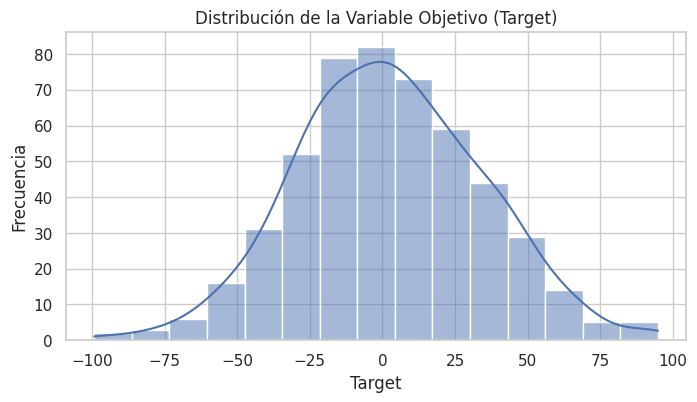


Conjunto de datos de alta dimensión: visualización simplificada
Primeras 5 muestras de las primeras 5 características (X):
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5
0   0.036644   0.017113   0.021966  -0.010405  -0.005107
1  -0.017968   0.076363   0.030209  -0.010355  -0.007871
2  -0.062322   0.054282  -0.022764  -0.009531  -0.005503
3  -0.013379   0.054940   0.038196  -0.060945  -0.003995
4   0.009808  -0.043084   0.004323  -0.064556   0.055371
Últimas 5 características del conjunto de datos (X):
   Feature_46  Feature_47  Feature_48  Feature_49  Feature_50
0    0.064826    0.018394    0.030959   -0.022168    0.000853
1   -0.014563    0.021819    0.010481    0.023362    0.054176
2    0.083322   -0.002841   -0.122792   -0.006650   -0.015187
3    0.042450    0.010417    0.010220    0.012129    0.006421
4    0.001419    0.039937   -0.017295   -0.094760   -0.024151

Correlación de las características con el Target:
Feature_13    0.156054
Feature_4     0.136208
Feature_15  

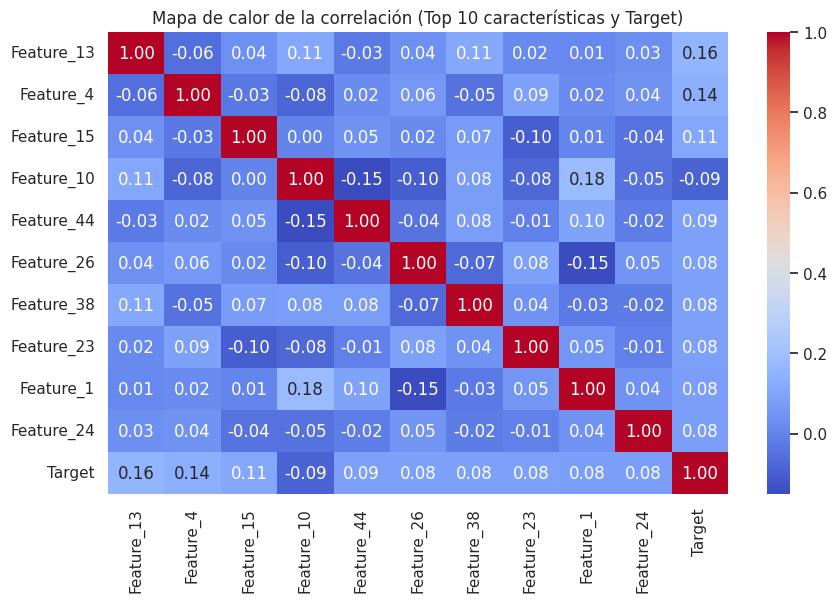

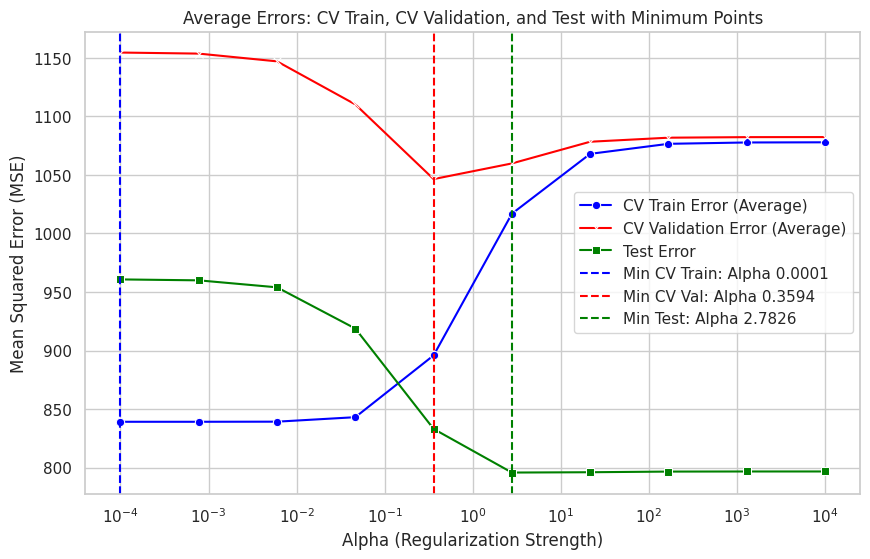

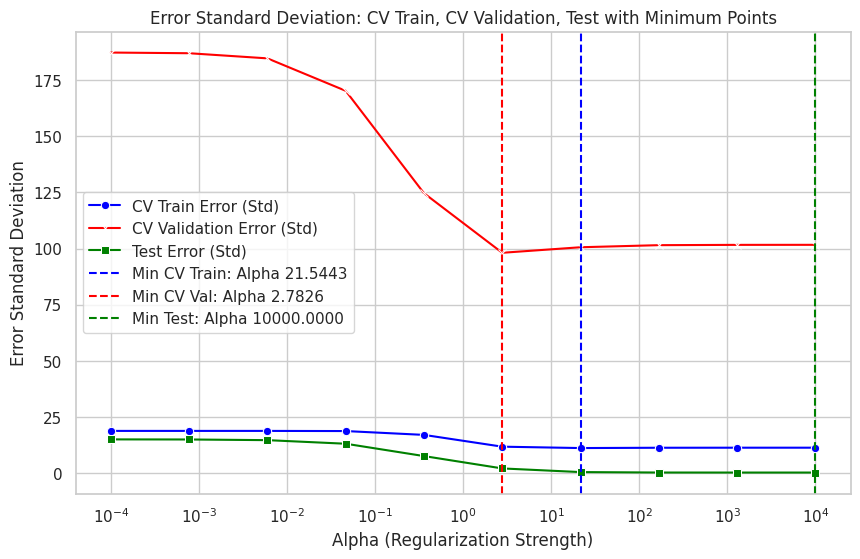

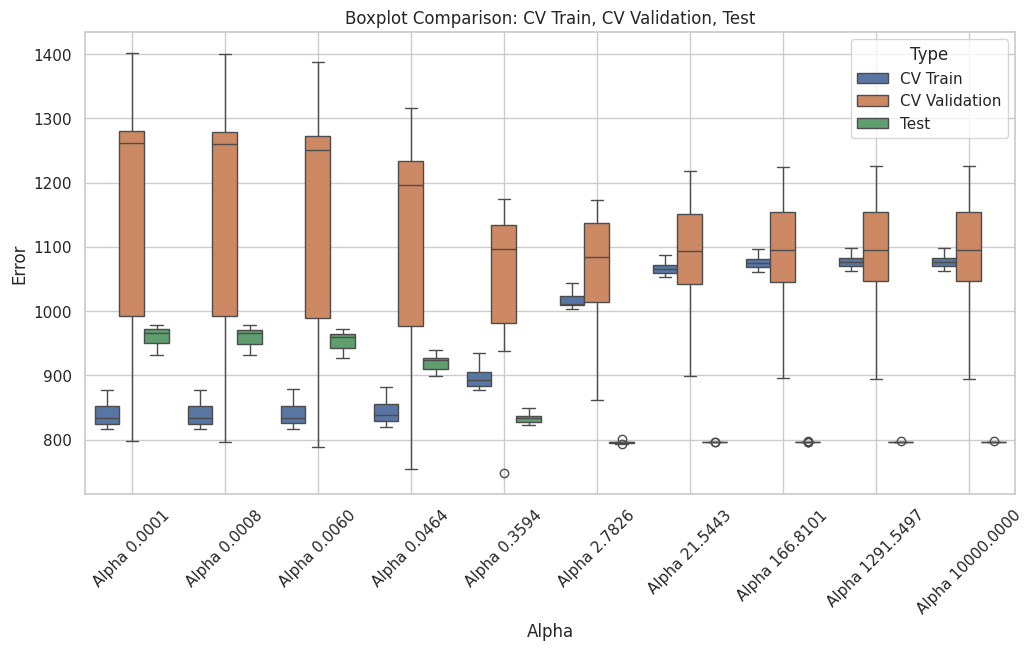

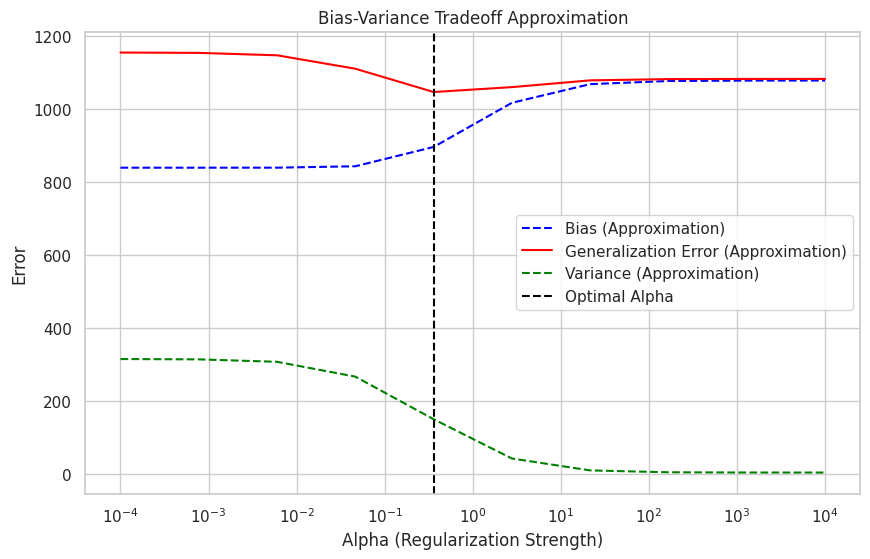

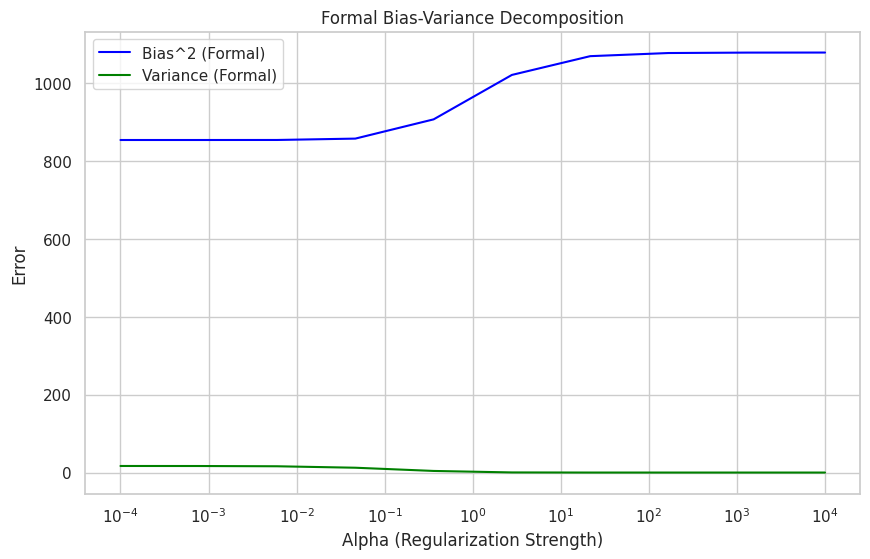

In [10]:

# Main function to allow students to easily test different configurations
def run_experiment(n_samples=100, n_features=10, noise=10, n_informative=8, tail_strength=0.5, effective_rank=None, alphas=None, train_size=0.8, cv_folds=5):
    X, y = create_data(n_samples=n_samples, n_features=n_features, noise=noise, n_informative=n_informative, tail_strength=tail_strength, effective_rank=effective_rank)
    
    if alphas is None:
        alphas = np.logspace(-4, 4, 10)

    (train_errors_mean, cv_errors_mean, test_errors_mean, train_errors_std, cv_errors_std, 
     test_errors_std, all_train_cv_errors, all_val_cv_errors, all_test_errors, 
     formal_bias_squared, formal_variance) = analyze_ridge_cv_bias_variance(X, y, alphas, train_size=train_size, cv_folds=cv_folds)

    plot_avg_errors(alphas, train_errors_mean, cv_errors_mean, test_errors_mean)
    plot_error_std(alphas, train_errors_std, cv_errors_std, test_errors_std)
    plot_boxplot_errors(all_train_cv_errors, all_val_cv_errors, all_test_errors, alphas)
    plot_bias_variance_tradeoff(alphas, cv_errors_mean, train_errors_mean)  # Approximation
    plot_formal_bias_variance(alphas, formal_bias_squared, formal_variance)  # Formal Bias-Variance Decomposition

# Example usage
# n_samples: Number of samples
# n_features: Total number of features
# noise: Amount of noise added to the regression problem
# n_informative: Number of features that are actually informative
# tail_strength: Degree to which less important features affect the target
# effective_rank: Approximate rank of the data matrix
# alphas: Range of regularization strengths (alphas)
# cv_folds: Number of cross-validation folds
# train_size: Percentage of data to be used for training

run_experiment(n_samples=500, n_features=50, noise=30, n_informative=40, tail_strength=0.3, effective_rank=40, alphas=np.logspace(-4, 4, 10), train_size=0.8, cv_folds=10)
